In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import torch
import os.path as osp
import seaborn as sb
from matplotlib import pyplot as plt
import glob
import utils
from yaml import Loader, load
import pickle5 as pickle
from matplotlib import cm
import itertools as it

In [3]:
base_dir = '/home/fiona/birdMigration/results/radar'
voronoi = gpd.read_file('/home/fiona/birdMigration/data/raw/radar/fall/2015/voronoi.shp').to_crs(epsg='4326')
boundary = voronoi.query('boundary == True').radar.values

In [10]:
def load_results(models, experiments, base_dir):
    results = dict()
    bird_scales = dict()
    for i, m in enumerate(models):

        experiment = experiments[i]

        # load predictions
        model_dir = osp.join(base_dir, 'testing', m, experiment)
        files = glob.glob(model_dir + "/**/results.csv", recursive = True)
        results[m] = pd.read_csv(files[0])

        # load bird scales
        fp = osp.join(base_dir, 'training', m, experiment, 'config.yaml')
        with open(fp) as f:
            cfg = load(f, Loader=Loader)
        bird_scales[m] = cfg['datasource']['bird_scale']
    return results, bird_scales

## Previous results
### All radars

In [5]:
models = ['HA', 'GAM', 'GBT', 'LocalMLP', 'LocalLSTM', 'BirdFluxGraphLSTM']
experiments = ['best_settings_evaluate_daytime_km2',
               'best_settings_evaluate_daytime_km2',
                'best_settings_evaluate_daytime_with_acc_vars', 
               'best_settings_evaluate_daytime_with_acc_vars', 
               'best_settings_evaluate_daytime',
              'best_settings_evaluate_daytime']
results_previous, bird_scales_previous = load_results(models, experiments, base_dir)

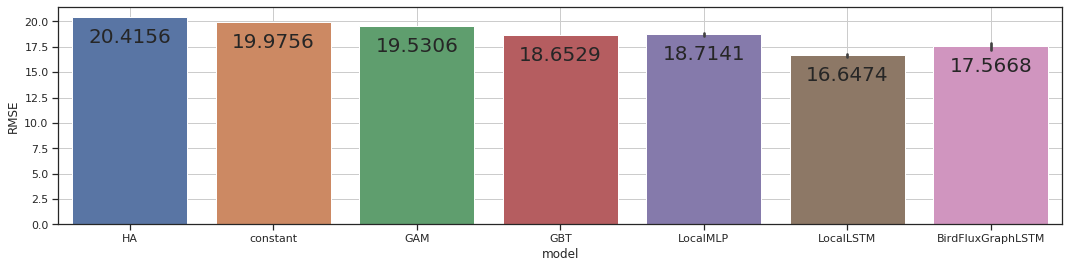

In [6]:
fig = utils.plot_average_errors(results_previous, night_only=True)

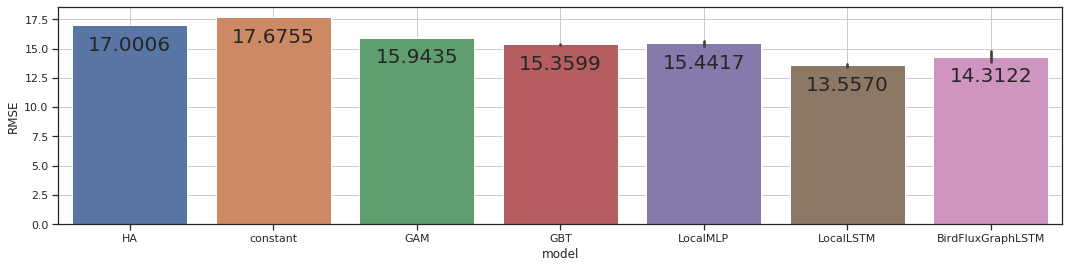

In [8]:
fig = utils.plot_average_errors(results_previous, boundary=['bezav'], night_only=True)

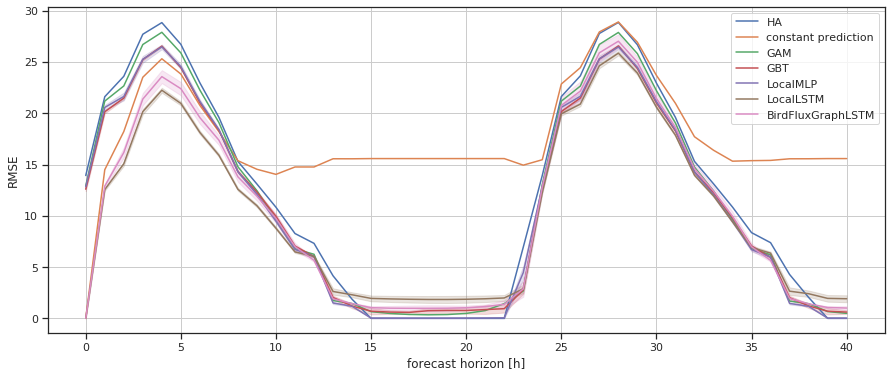

In [9]:
fig = utils.plot_errors(results_previous)

### Fixed boundary radars

In [11]:
models = ['HA', 'GAM', 'GBT', 'LocalMLP', 'LocalLSTM', 'BirdFluxGraphLSTM']
experiments = ['best_settings_evaluate_daytime_km2',
               'best_settings_evaluate_daytime_km2',
                'best_settings_evaluate_daytime_with_acc_vars', 
               'best_settings_evaluate_daytime_with_acc_vars', 
               'best_settings_evaluate_daytime',
              'best_settings_evaluate_daytime_fixed_boundary']
results_previous_fixed_boundary, bird_scales_previous_fixed_boundary = load_results(models, experiments, base_dir)

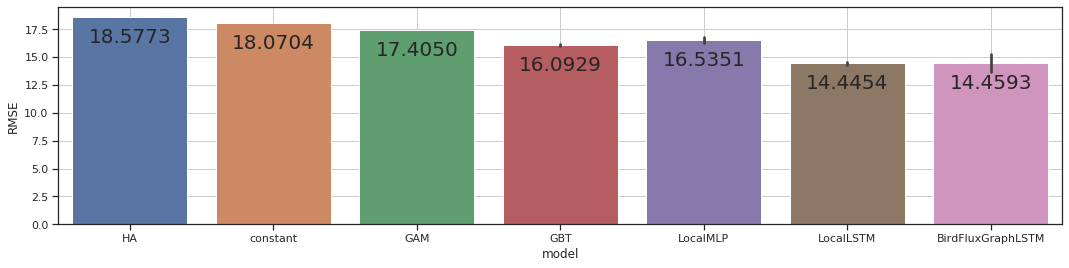

In [15]:
fig = utils.plot_average_errors(results_previous_fixed_boundary, boundary=boundary, night_only=True)

## New results: Use environmental conditions from previous timestep in "edge NN"
### Fixed boundary radars

In [16]:
models = ['LocalLSTM', 'BirdFluxGraphLSTM']
experiments = ['best_settings_evaluate_daytime',
              'best_settings_evaluate_daytime_fixed_boundary_env_previous_enforce_conservation']
results_env_prev_fixed_boundary, bird_scales_env_prev_fixed_boundary = load_results(models, experiments, base_dir)

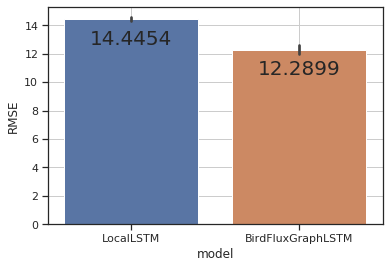

In [17]:
fig = utils.plot_average_errors(results_env_prev_fixed_boundary, boundary=boundary, night_only=True)